In [236]:
#Yuvan Shankar J
#2019504609
#Assignment 4

# Importing required libraries


In [237]:
import re
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import keras
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [238]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
import contractions

# Read the dataset and do preprocessing

In [240]:
dataset=pd.read_csv("/content/drive/MyDrive/spam.csv",delimiter=',',encoding='latin-1')
dataset.head() #to display the first 5 rows of the dataset read in the previous line

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [241]:
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [242]:
dataset.columns = ["SpamHam","Tweet"]


Text(0.5, 1.0, 'Number of Ham and Spam messages')

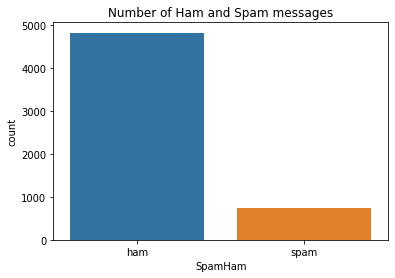

In [243]:
sns.countplot(data=dataset,x='SpamHam')
plt.title('Number of Ham and Spam messages')

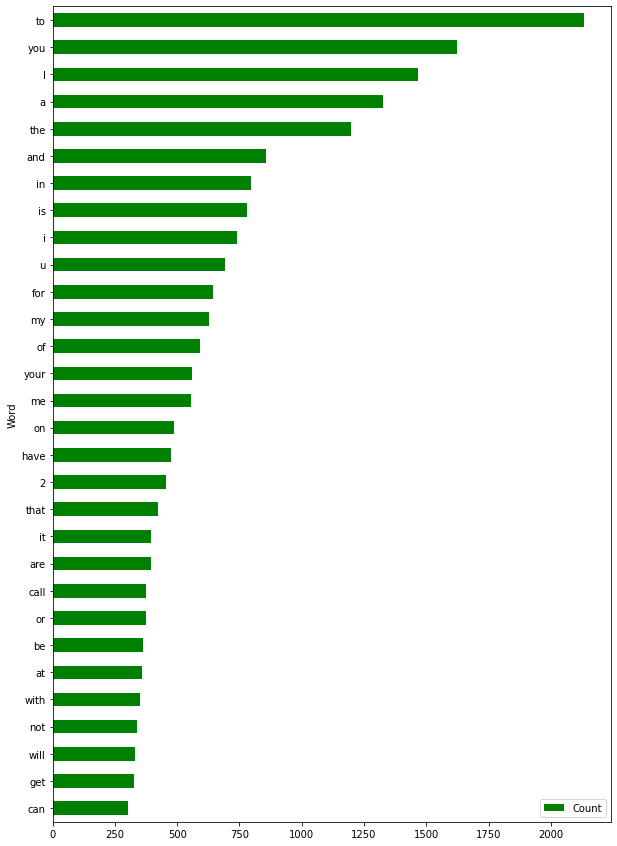

In [244]:
import collections
def word_count_plot(data):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="green", figsize=(10, 15))
word_count_plot(dataset["Tweet"])

In [245]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [246]:
lem = WordNetLemmatizer()
def preprocessing(data): #to get the most common words other than the stop words
      sms = contractions.fix(data) # converting shortened words to original 
      sms = sms.lower() # lower casing the sms
      sms = re.sub(r'https?://S+|www.S+', "", sms).strip() #removing url
      sms = re.sub("[^a-z ]", "", sms) # removing symbols and numbes
      sms = sms.split() #splitting
      # lemmatization and stopword removal
      sms = [lem.lemmatize(word) for word in sms if not word in set(stopwords.words("english"))]
      sms = " ".join(sms)
      return sms
X = dataset["Tweet"].apply(preprocessing)

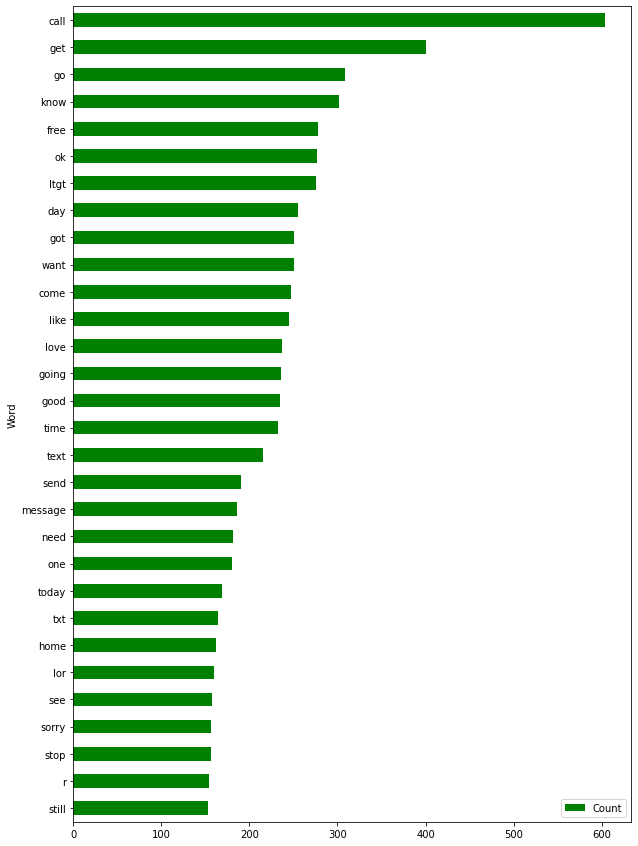

In [247]:
word_count_plot(X)

In [267]:
# Label encoding target column
Y = dataset.SpamHam
le = LabelEncoder()
Y = le.fit_transform(Y)
token=Tokenizer()
token.fit_on_texts(X)
sequences_matrix = token.texts_to_sequences(X)
for i in range(5):
           print("Text: ",X[i] )
           print("Numerical Sequence : ", sequences_matrix[i])

Text:  go jurong point crazy available bugis n great world la e buffet cine got amore wat
Numerical Sequence :  [3, 3575, 255, 549, 522, 1028, 35, 56, 236, 845, 80, 2411, 1029, 9, 3576, 70]
Text:  ok lar joking wif oni
Numerical Sequence :  [6, 220, 1173, 328, 1539]
Text:  free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
Numerical Sequence :  [5, 342, 582, 724, 92, 1540, 846, 478, 1541, 147, 175, 17, 1540, 221, 342, 2412, 23, 2413, 263, 2414]
Text:  dun say early hor c already say
Numerical Sequence :  [142, 48, 256, 2415, 69, 75, 48]
Text:  nah think go usf life around though
Numerical Sequence :  [774, 33, 3, 725, 86, 121, 195]


In [269]:
#sequences in sequence_matrix are not of same length. Therefore we are padding zeros
max_length_sequence = max([len(i) for i in sequences_matrix])
 # finding the length of largest sequence
padded_sms_sequence=pad_sequences(sequences_matrix, maxlen=max_length_sequence,padding = "pre") 
for i in range(5):
  print(padded_sms_sequence[i])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    3 3575  255  549  522 1028   35
   56  236  845   80 2411 1029    9 3576   70]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    6  220 1173  328 1539]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    

# Create the model and add layers


In [270]:
TOT_SIZE = len(token.word_index)+1
def model_creation():
    
      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(128))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
model = model_creation()

# Compile the model

In [271]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 79, 32)            250240    
                                                                 
 lstm_14 (LSTM)              (None, 128)               82432     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 20)                2580      
                                                                 
 dropout_24 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 335,273
Trainable params: 335,273
Non-t

# Fit the model

In [272]:
history=model.fit(padded_sms_sequence, Y, epochs = 8, validation_split=0.2, batch_size=16)

Epoch 1/8
279/279 [==============================] - 22s 72ms/step - loss: 0.1973 - accuracy: 0.9387 - val_loss: 0.0598 - val_accuracy: 0.9812
Epoch 2/8
279/279 [==============================] - 19s 70ms/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 0.0578 - val_accuracy: 0.9848
Epoch 3/8
279/279 [==============================] - 20s 70ms/step - loss: 0.0124 - accuracy: 0.9975 - val_loss: 0.0894 - val_accuracy: 0.9776
Epoch 4/8
279/279 [==============================] - 20s 71ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.1095 - val_accuracy: 0.9794
Epoch 5/8
279/279 [==============================] - 20s 71ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.1565 - val_accuracy: 0.9650
Epoch 6/8
279/279 [==============================] - 20s 72ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.1214 - val_accuracy: 0.9785
Epoch 7/8
279/279 [==============================] - 21s 75ms/step - loss: 0.0161 - accuracy: 0.9957 - val_loss: 0.0814 - val_accuracy: 0.9776

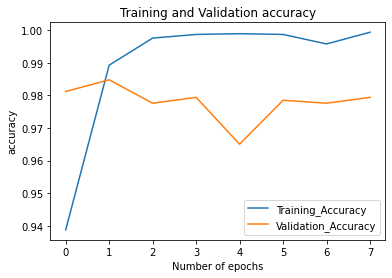

In [274]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graph(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graph('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Save the model

In [278]:
model.save('Spam_sms_classification.h5')

# Test the model

In [279]:
X_train,X_test,Y_train,Y_test = train_test_split(padded_sms_sequence,Y,test_size=0.2)

In [281]:
accuracy1=model.evaluate(X_test,Y_test)

35/35 [==============================] - 1s 39ms/step - loss: 0.0227 - accuracy: 0.9964
